# Notebook to look at correlation among DJIA Stocks

In [20]:
import glob
import os

import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

from deep_rl_asset_allocation.configs import data_config, paths_config
from deep_rl_asset_allocation.preprocessing import data_preprocessing

### Helper Functions

In [21]:
def get_daily_return_as_df(df):
    df['daily_return'] = df["Adj Close"].pct_change(1)
    return df

### Load Data from Tickers

In [22]:
df = pd.read_csv(paths_config.TESTING_DATA_FILE)
df["Date"] = df.apply(data_preprocessing.convert_datadate_to_datetime, axis=1)

In [23]:
df = get_daily_return_as_df(df)

In [24]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,daily_return
0,2009-01-02,8772.250000,9065.280273,8760.780273,9034.690430,9034.690430,213700000,NaN
1,2009-01-05,9027.129883,9034.370117,8892.360352,8952.889648,8952.889648,233760000,-0.009054
2,2009-01-06,8954.570312,9088.059570,8940.950195,9015.099609,9015.099609,215410000,0.006949
3,2009-01-07,8996.940430,8996.940430,8719.919922,8769.700195,8769.700195,266710000,-0.027221
4,2009-01-08,8769.940430,8770.019531,8651.190430,8742.459961,8742.459961,226620000,-0.003106


### Plot Historical Prices

In [25]:
training_df = df[(df.Date >= data_config.TRAINING_START) & (df.Date < data_config.TRAINING_END)].reset_index(drop=True)
validation_df = df[(df.Date >= data_config.VALIDATION_START) & (df.Date < data_config.VALIDATION_END)].reset_index(drop=True)
testing_df = df[(df.Date >= data_config.TESTING_START) & (df.Date < data_config.TESTING_END)].reset_index(drop=True)
type(training_df.Date[0])

datetime.date

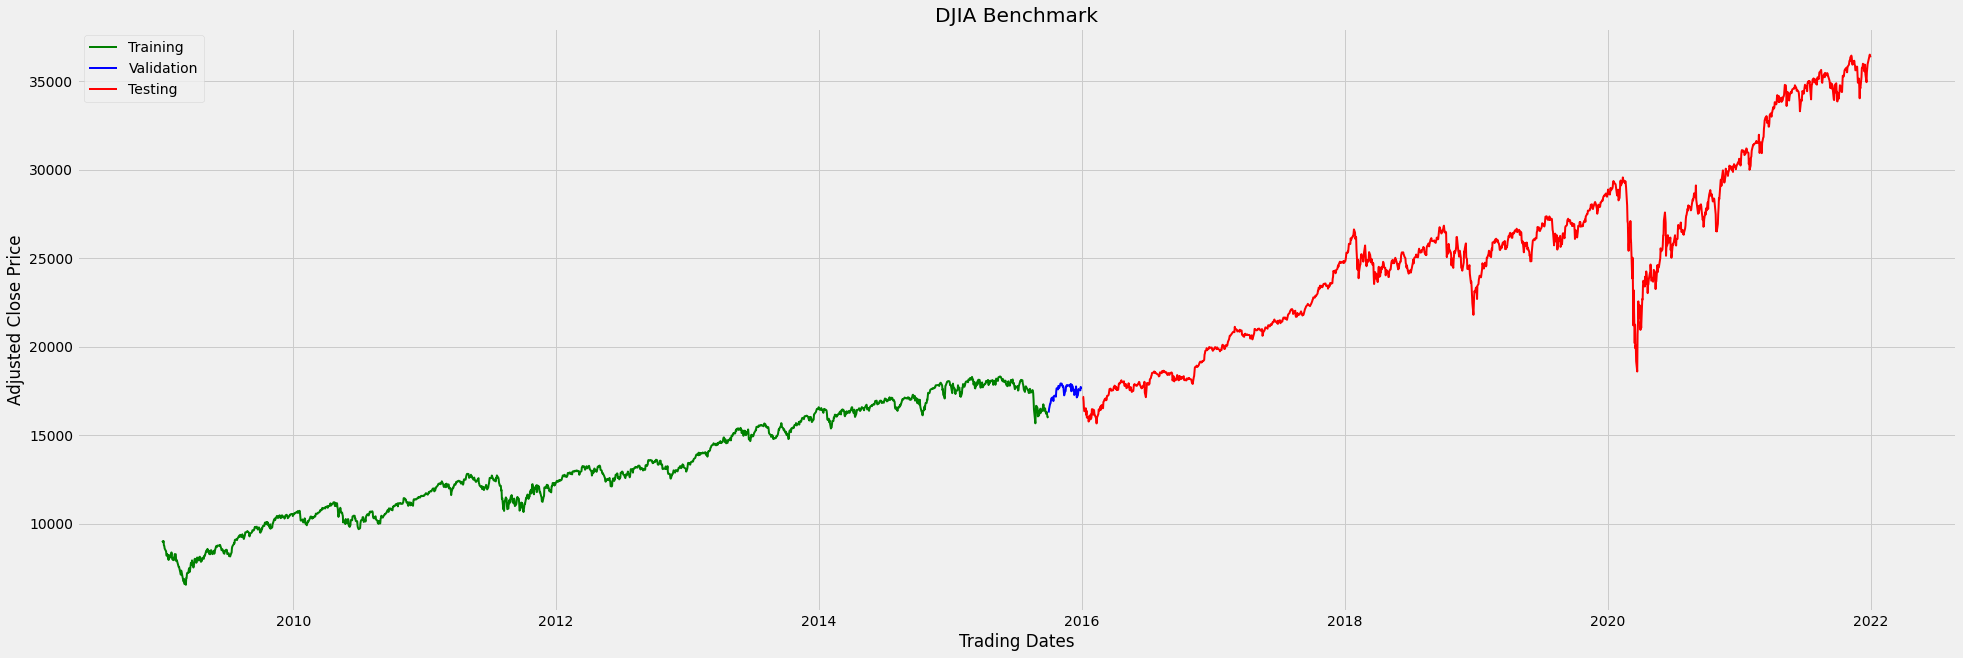

In [29]:
# init the plot
fig, ax = plt.subplots(figsize=(30, 10))
plt.style.use("fivethirtyeight")

ax.set(xlabel="Trading Dates",
       ylabel="Adjusted Close Price",
       title="DJIA Benchmark",
       )

# plot train, val, and test
ax.plot(training_df["Date"], training_df["Adj Close"], 'g', linewidth=2, label="Training")
ax.plot(validation_df["Date"], validation_df["Adj Close"], 'b', linewidth=2, label="Validation")
ax.plot(testing_df["Date"], testing_df["Adj Close"], 'r', linewidth=2, label="Testing")

# ax1 = ax.twinx()
# ax1.plot(df["Date"], df["daily_return"].cumsum(), label="DJIA")

plt.legend(loc='upper left')

### Look at Expected Returns

In [73]:
# aggregate_df = pd.read_csv(paths_config.AGGREGATE_DJIA_ADJ_CLOSE_FILE)
aggregate_df = pd.read_csv(paths_config.TESTING_DATA_FILE)
aggregate_df["Date"] = aggregate_df.apply(data_preprocessing.convert_datadate_to_datetime, axis=1)
# aggregate_df = aggregate_df.set_index("Date")

In [71]:
# aggregate_df.head()

In [70]:
# from pypfopt import risk_models
# from pypfopt import expected_returns

# avg_returns = expected_returns.mean_historical_return(aggregate_df)
# cov_mat = risk_models.sample_cov(aggregate_df)

# avg_returns

In [81]:
from pypfopt import risk_models
from pypfopt import expected_returns

years_list = pd.date_range(data_config.TRAINING_START, data_config.TESTING_END, freq='y')

dates_list = []
avg_returns_list = []
cov_mat_list = []

for idx in range(1, len(years_list)):
    _START = years_list[idx-1].date()
    _END = years_list[idx].date()
    # print(f"{_START} to {_END}")

    _df = aggregate_df[(aggregate_df.Date >= _START) & (aggregate_df.Date < _END)].reset_index(drop=True)
    _df = _df[["Date", "Adj Close"]]
    _df = _df.set_index("Date")
    # print(f"df: {len(_df)}")

    avg_returns = expected_returns.mean_historical_return(_df)
    cov_mat = risk_models.sample_cov(_df)

    # print(float(avg_returns.values))
    # print(float(cov_mat.values))